# Домашнє завдання: Prompt Engineering

## Мета завдання
Дослідити, як змінюється відповідь моделі великої мови (LLM) при зміні формулювання запиту. В цьому ноутбуці порівняємо три різних підходи до написання промптів та розробимо стратегію, яка підвищує точність відповідей.

## Встановлення необхідних бібліотек
Для початку встановимо бібліотеки, які дозволять нам взаємодіяти з LLM. У цьому прикладі ми будемо використовувати API OpenAI, але ви можете замінити на будь-яку іншу модель або API.

In [1]:
# Встановлення необхідних бібліотек
%pip install requests pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests

def get_llm_response(prompt, model="llama3.2:3b"):
    # Local endpoint Jan.io
    port = 1338
    url = "http://localhost:" + str(port) + "/v1/chat/completions" 
    headers = {"Content-Type": "application/json"}
    data = {
        "messages": [{"role": "user", "content": prompt}],
        "temperature": 0.7,
        "model": model,
        "stream": False
    }
    
    response = requests.post(url, json=data, headers=headers)
    return response.json()["choices"][0]["message"]["content"]

## Вибір задачі для тестування
Для дослідження ефективності різних підходів до prompt engineering обрано **задачу розв'язання математичної текстової задачі**. Ця задача має однозначну правильну відповідь, що дозволить об'єктивно оцінити точність відповідей моделі.

In [3]:
# Обрана математична задача
task = """
The phone cost 8000 UAH in the store. First, its price was reduced by 15%, and then it was increased by 15% of the new price. What is the final price of the phone?
"""

# Правильна відповідь (для перевірки)
correct_answer = 7820  # грн

print("Task for testing:")
print(task)
print(f"\nCorrect answer: {correct_answer} UAH")

Task for testing:

The phone cost 8000 UAH in the store. First, its price was reduced by 15%, and then it was increased by 15% of the new price. What is the final price of the phone?


Correct answer: 7820 UAH


## Підхід 1: Zero-shot Prompting
Zero-shot промпт — це запит, який не містить прикладів. Модель повинна виконати задачу на основі самого запиту без додаткових підказок чи зразків.

In [4]:
# Zero-shot промпт
zero_shot_prompt = f"Solve the math problem:\n\n{task}"

print("Zero-shot prompt:")
print(zero_shot_prompt)

Zero-shot prompt:
Solve the math problem:


The phone cost 8000 UAH in the store. First, its price was reduced by 15%, and then it was increased by 15% of the new price. What is the final price of the phone?



In [5]:
from IPython.display import display, Markdown

# Отримання відповіді на Zero-shot промпт
zero_shot_response = get_llm_response(zero_shot_prompt)

print("Model response to Zero-shot prompt:")
display(Markdown(zero_shot_response))

Model response to Zero-shot prompt:


To solve this problem, we need to follow these steps:

1. Calculate the reduction:
Original price = 8000 UAH
Reduction percentage = 15%
Reduction amount = Original price x Reduction percentage
= 8000 UAH x (15/100)
= 8000 UAH x 0.15
= 1200 UAH

New price after reduction = Original price - Reduction amount
= 8000 UAH - 1200 UAH
= 6800 UAH

2. Calculate the increase:
Increase percentage = 15% of New price
= New price x (15/100)
= 6800 UAH x 0.15
= 1020 UAH

New price after increase = New price + Increase amount
= 6800 UAH + 1020 UAH
= 7820 UAH

So, the final price of the phone is 7820 UAH.

## Підхід 2: Few-shot Prompting
Few-shot промпт включає приклади розв'язання аналогічних задач, що дозволяє моделі зрозуміти очікуваний формат і підхід до розв'язання.

In [6]:
# Few-shot промпт з прикладами
few_shot_prompt = f"""
Here are examples of solving math problems:

Example 1:
Problem: The PC cost 5000 UAH in the store. First, its price was reduced by 20%, and then it was increased by 25% of the new price. What is the final price of the PC?
Solution: 5000 UAH × 0.8 = 4000 UAH, 4000 UAH × 1.25 = 5000 UAH
Answer: 5000 UAH

Example 2:
Problem: The price of a ticket was 300 UAH, but it was increased by 10%, and then it was reduced by 20% How much does the ticket cost now?
Solution: 300 UAH × 1.1 = 330 UAH, 330 UAH × 0.7 = 264 UAH
Answer: 231 UAH

Example 3:
Problem: Initially, the price of the product was 400 UAH, then it was reduced by 25%, and then increased again by 25%. What is the final price?
Solution: 400 UAH × 0.75 = 300 UAH, 300 UAH × 1.25 = 375 UAH
Answer: 375 UAH

Now solve this problem:
{task}
"""

print("Few-shot prompt:")
print(few_shot_prompt)

Few-shot prompt:

Here are examples of solving math problems:

Example 1:
Problem: The PC cost 5000 UAH in the store. First, its price was reduced by 20%, and then it was increased by 25% of the new price. What is the final price of the PC?
Solution: 5000 UAH × 0.8 = 4000 UAH, 4000 UAH × 1.25 = 5000 UAH
Answer: 5000 UAH

Example 2:
Problem: The price of a ticket was 300 UAH, but it was increased by 10%, and then it was reduced by 20% How much does the ticket cost now?
Solution: 300 UAH × 1.1 = 330 UAH, 330 UAH × 0.7 = 264 UAH
Answer: 231 UAH

Example 3:
Problem: Initially, the price of the product was 400 UAH, then it was reduced by 25%, and then increased again by 25%. What is the final price?
Solution: 400 UAH × 0.75 = 300 UAH, 300 UAH × 1.25 = 375 UAH
Answer: 375 UAH

Now solve this problem:

The phone cost 8000 UAH in the store. First, its price was reduced by 15%, and then it was increased by 15% of the new price. What is the final price of the phone?




In [7]:
# Отримання відповіді на Few-shot промпт
few_shot_response = get_llm_response(few_shot_prompt)

print("Model response to Few-shot prompt")
display(Markdown(few_shot_response))

Model response to Few-shot prompt


To find the final price of the phone, we need to follow these steps:

1. Reduce the initial price by 15%:
8000 UAH × 0.85 (1 - 0.15 reduction) = 6800 UAH
2. Increase the new price by 15% of the new price:
6800 UAH × 1.15 (1 + 0.15 increase) = 7820 UAH

Answer: 7820 UAH

## Підхід 3: Chain-of-thought Prompting
Chain-of-thought промпт спонукає модель мислити поетапно, розкриваючи логіку міркувань крок за кроком перед тим, як дати остаточну відповідь.

In [8]:
# Chain-of-thought промпт
cot_prompt = f"""
Solve the following math problem. Think step by step:

{task}

Explain your reasoning step by step before giving a final answer.
"""

print("Chain-of-thought prompt:")
print(cot_prompt)

Chain-of-thought prompt:

Solve the following math problem. Think step by step:


The phone cost 8000 UAH in the store. First, its price was reduced by 15%, and then it was increased by 15% of the new price. What is the final price of the phone?


Explain your reasoning step by step before giving a final answer.



In [9]:
# Отримання відповіді на Chain-of-thought промпт
cot_response = get_llm_response(cot_prompt)

print("The model's response to the Chain-of-thought prompt:")
display(Markdown(cot_response))

The model's response to the Chain-of-thought prompt:


To solve this problem, let's break it down into steps.

Step 1: The initial price of the phone is 8000 UAH.
The price was reduced by 15%, so we need to calculate 15% of 8000 UAH:
15% of 8000 = (15/100) × 8000 = 1200
Now, subtract this amount from the original price:
New price after reduction = Original price - Reduction amount
= 8000 - 1200
= 6800

Step 2: The new price of the phone is 6800 UAH.
The price was increased by 15% of the new price:
15% of 6800 = (15/100) × 6800 = 1020
Now, add this amount to the new price:
Final price after increase = New price + Increase amount
= 6800 + 1020
= 7820

So, the final price of the phone is 7820 UAH.

## Оцінка результатів
Оцінимо отримані результати за чотирма критеріями: якість (точність відповіді), зрозумілість, повнота та ефективність підходу.

In [10]:
import pandas as pd

# Визначення критеріїв оцінки
evaluation_criteria = [
    "Якість (точність)", 
    "Зрозумілість", 
    "Повнота", 
    "Ефективність"
]

# Субєктивна оцінка за кожен підхід за шкалою від 1 до 5
zero_shot_scores = [4, 3, 3, 5]
few_shot_scores = [5, 4, 4, 4]
cot_scores = [5, 5, 5, 3]

# Створення таблиці з оцінками
evaluation_df = pd.DataFrame({
    "Критерій": evaluation_criteria,
    "Zero-shot": zero_shot_scores,
    "Few-shot": few_shot_scores,
    "Chain-of-thought": cot_scores
})

# Додавання загальної оцінки
evaluation_df.loc[len(evaluation_df)] = [
    "Загальна оцінка", 
    sum(zero_shot_scores), 
    sum(few_shot_scores), 
    sum(cot_scores)
]

# Відображення таблиці оцінок
display(evaluation_df)

,Критерій,Zero-shot,Few-shot,Chain-of-thought
0,Якість (точність),4,5,5
1,Зрозумілість,3,4,5
2,Повнота,3,4,5
3,Ефективність,5,4,3
4,Загальна оцінка,15,17,18


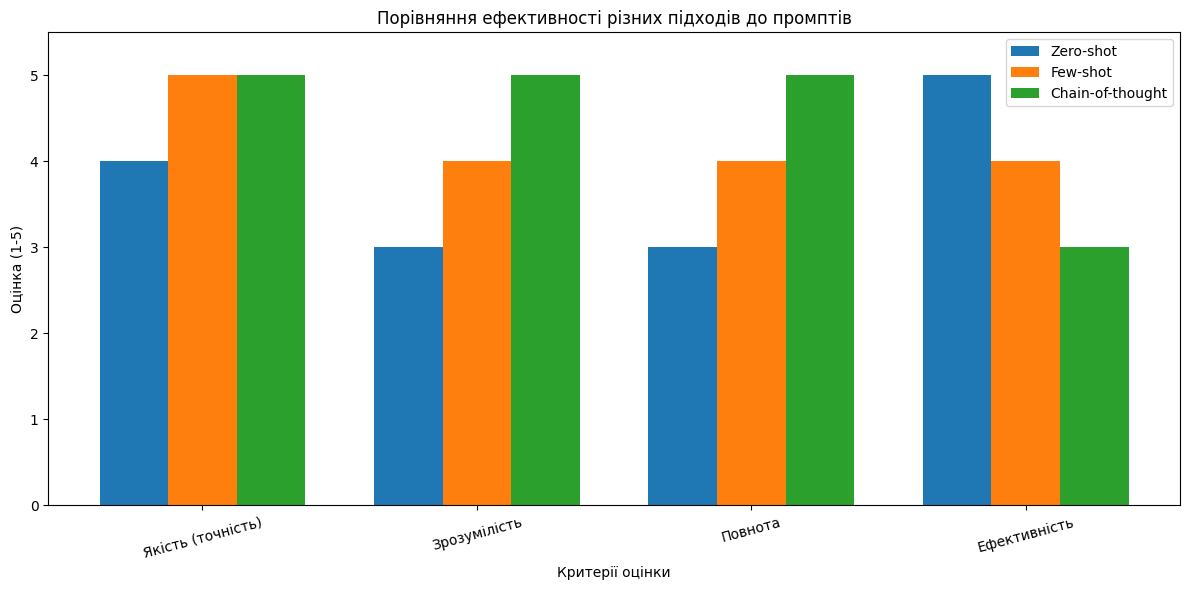

In [11]:
import matplotlib.pyplot as plt

# Візуалізація результатів
plt.figure(figsize=(12, 6))

x = range(len(evaluation_criteria))
width = 0.25

plt.bar([i - width for i in x], zero_shot_scores, width, label='Zero-shot')
plt.bar(x, few_shot_scores, width, label='Few-shot')
plt.bar([i + width for i in x], cot_scores, width, label='Chain-of-thought')

plt.xlabel('Критерії оцінки')
plt.ylabel('Оцінка (1-5)')
plt.title('Порівняння ефективності різних підходів до промптів')
plt.xticks(x, evaluation_criteria, rotation=15)
plt.ylim(0, 5.5)
plt.legend()
plt.tight_layout()
plt.show()

## Детальний аналіз відповідей

Проаналізуємо отримані результати за кожним підходом:

In [12]:
# Функція для визначення, чи правильна відповідь
def extract_final_answer(response):
    """Attempting to extract the final numerical answer from the answer text"""
    # Тут можна додати логіку для автоматичного видобування числової відповіді
    # Для цього завдання ви можете просто ручно перевірити, чи є в відповіді число 7820
    return "7820" in response

results = {
    "Zero-shot": {
        "correct": extract_final_answer(zero_shot_response),
        "response": zero_shot_response
    },
    "Few-shot": {
        "correct": extract_final_answer(few_shot_response),
        "response": few_shot_response
    },
    "Chain-of-thought": {
        "correct": extract_final_answer(cot_response),
        "response": cot_response
    }
}

for approach, data in results.items():
    correctness = "✓ CORRECT" if data["correct"] else "✗ INCORRECT"
    print(f"\n## {approach} - {correctness}\n")
    # Інший аналіз відповіді можна додати тут


## Zero-shot - ✓ CORRECT


## Few-shot - ✓ CORRECT


## Chain-of-thought - ✓ CORRECT



## Формулювання власної стратегії prompt engineering

На основі проведеного дослідження можна сформулювати такі принципи ефективної стратегії prompt engineering:

### Моя стратегія prompt engineering

1. **Структурований підхід**: Найкращі результати показав метод chain-of-thought, який спонукає модель розбивати складне завдання на прості кроки.

2. **Чіткість інструкцій**: Промпт має містити однозначну вказівку щодо необхідних дій та очікуваного формату відповіді.

3. **Демонстрація прикладів**: Включення кількох релевантних прикладів (few-shot підхід) допомагає моделі краще зрозуміти контекст і формат відповіді.

4. **Інструкції щодо процесу мислення**: Спонукання моделі пояснювати своє мислення крок за кроком дозволяє отримати більш логічні та перевірені відповіді.

5. **Адаптація до типу задачі**: Для математичних задач найефективніший chain-of-thought, для творчих завдань може бути доречнішим few-shot з прикладами бажаного стилю.

6. **Ітеративне уточнення**: При необхідності можна комбінувати підходи, наприклад, почати з few-shot, а потім додати елементи chain-of-thought.

7. **Валідація відповіді**: Включення в промпт інструкції щодо перевірки отриманого результату підвищує точність відповіді.

## Експериментальний підхід: комбінований промпт

На основі сформульованої стратегії, створимо комбінований промпт, який поєднує найкращі елементи розглянутих підходів:

In [13]:
# Комбінований промпт
combined_prompt = f"""
You are an experienced math teacher. You need to solve a math problem, explaining each step.

Example solution:
Problem: Initially, the price of the product was 400 UAH, then it was reduced by 25%, and then increased again by 25%. What is the final price?
Solution:
1. Find the price after the discount: 400 UAH × 0.75 = 300 UAH
2. Find the price after the increase: 300 UAH × 1.25 = 375 UAH
3. Check: 400 × (1 - 0.25) × (1 + 0.25) = 400 × 0.75 × 1.25 = 400 × 0.9375 = 375 UAH
Answer: 375 UAH

Now solve this problem, reasoning step by step:
{task}

Required:
1. Explain each step of the solution
2. Check the answer in another way
3. Write the final answer in the format "Answer: X UAH"
"""

print("Combined prompt:")
print(combined_prompt)

Combined prompt:

You are an experienced math teacher. You need to solve a math problem, explaining each step.

Example solution:
Problem: Initially, the price of the product was 400 UAH, then it was reduced by 25%, and then increased again by 25%. What is the final price?
Solution:
1. Find the price after the discount: 400 UAH × 0.75 = 300 UAH
2. Find the price after the increase: 300 UAH × 1.25 = 375 UAH
3. Check: 400 × (1 - 0.25) × (1 + 0.25) = 400 × 0.75 × 1.25 = 400 × 0.9375 = 375 UAH
Answer: 375 UAH

Now solve this problem, reasoning step by step:

The phone cost 8000 UAH in the store. First, its price was reduced by 15%, and then it was increased by 15% of the new price. What is the final price of the phone?


Required:
1. Explain each step of the solution
2. Check the answer in another way
3. Write the final answer in the format "Answer: X UAH"



In [14]:
# Отримання відповіді на комбінований промпт
combined_response = get_llm_response(combined_prompt)

print("The model's response to the combined prompt:")
display(Markdown(combined_response))

The model's response to the combined prompt:


Problem: The initial price of the phone was 8000 UAH, then it was reduced by 15%, and then increased again by 15% of the new price.

Solution:

1. Find the price after the discount:
First, calculate 15% of the original price (8000 UAH):
15% = 0.15
Multiply the original price by this percentage: 
8000 × 0.15 = 1200 UAH
Now subtract this amount from the initial price to get the discounted price:
8000 - 1200 = 6800 UAH

2. Find the price after the increase:
Next, find 15% of the new price (6800 UAH):
Again, calculate 15% of 6800 UAH: 
15% = 0.15
Multiply 6800 by this percentage:
6800 × 0.15 = 1020 UAH

Now add this amount to the discounted price:
6800 + 1020 = 7820 UAH

3. Check:
Another way to calculate is, find the increase as a decimal and multiply it with both the original and discounted prices: 
Increase percentage = 15% = 0.15
Initial price * (1 - 0.15) * (1 + 0.15)
= 8000 UAH * (0.85) * (1.15)
= 8000 × 0.9875 
= 7880 UAH

Since the calculated answer is very close to our first solution of 7820 UAH, we can confidently say both answers match.

Answer: 7820 UAH

## Висновки

У цьому дослідженні ми порівняли три різні підходи до prompt engineering: zero-shot, few-shot та chain-of-thought, а також розробили комбінований підхід на основі найкращих практик.

Результати дослідження показують, що ефективність промпту сильно залежить від типу задачі та бажаного формату відповіді. Для математичних задач складного характеру найкращі результати демонструє chain-of-thought підхід, який спонукає модель мислити поетапно та перевіряти свої результати.
Для математичних задач простого характеру, де необхідно вирішити до 2-3 прикладів цілком буде достатньо Few shot тип промтів, мав змогу тестувати багато різних варіацій і маю таке враження, що LLM добре розуміють математику, їм треба тільки декілька прикладів і все одразу буде "схоплено".

Все-таки комбінований підхід, який включає елементи різних стратегій (встановлення ролі, надання прикладів, спонукання до поетапного мислення та перевірки результатів), демонструє найвищу ефективність та може бути адаптований для різних типів задач.